In [2]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

pygame 2.1.2 (SDL 2.0.18, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Create the environment, value table and policy

### Create the environment

In [3]:
env = Maze()

In [4]:
print(env)

<Maze instance>


### create Q(s,a) table

In [5]:
action_values = np.zeros((5,5,4))

In [6]:
action_values

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

### Create the policy pi(s)

In [21]:
def policy(state, epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [51]:
av = np.array([1, 2, 3, 3, 1])
print(np.flatnonzero(av==av.max()))

[2 3]


In [52]:
action_values[(2,3)]

array([-14.38775723, -14.28247665, -14.2589093 , -14.27009334])

### plot the value table

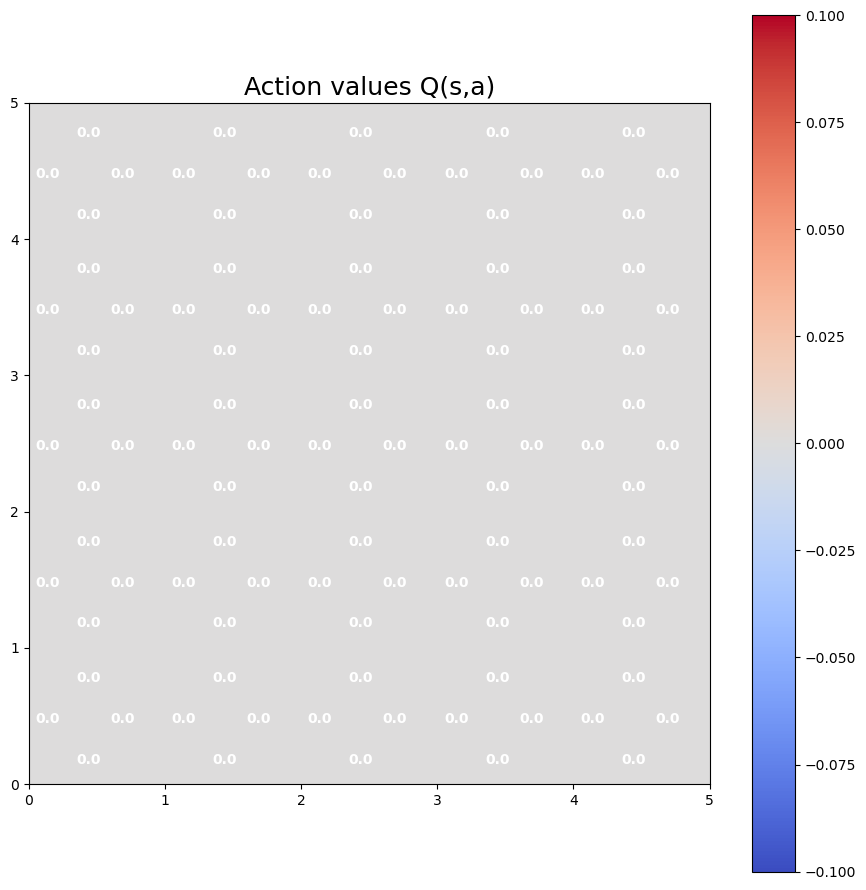

In [28]:
plot_action_values(action_values)

### plot the policy

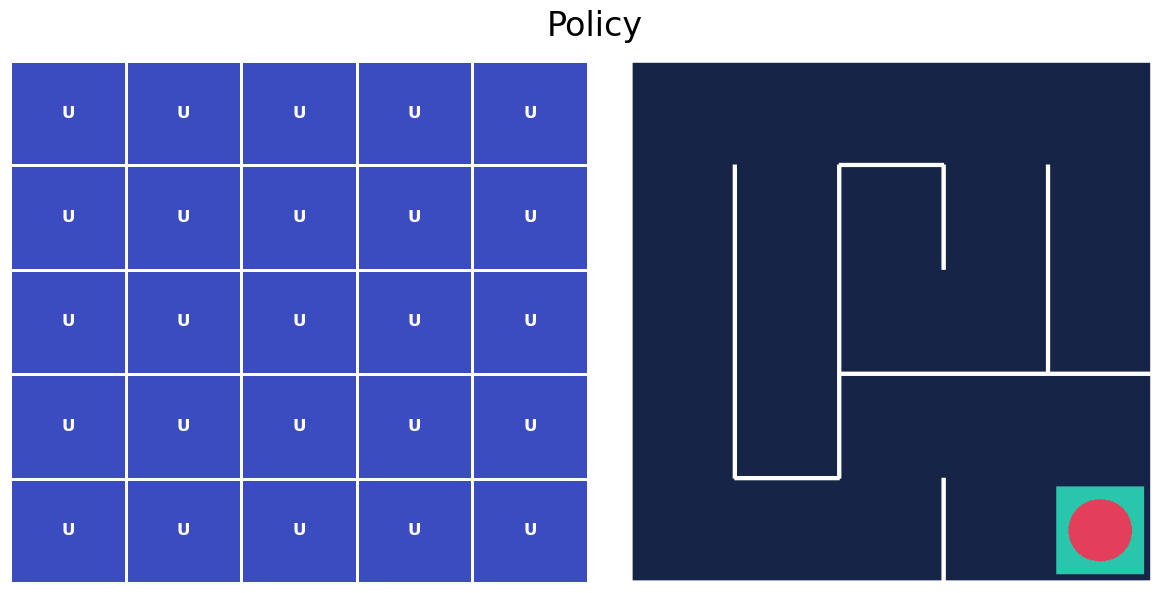

In [29]:
plot_policy(action_values, env.render(mode='rgb_array'))

In [48]:
def sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):
    for episodes in range(1, episodes+1):
        print(f"episode {episodes}")
        state = env.reset()
        #print(type(state))
        action = policy(state, epsilon)
        done = False

        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon)
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action


In [49]:
sarsa(action_values, policy, 10000)

episode 1
(1, 0)
1
(1, 0)
2
(2, 0)
2
(3, 0)
2
(4, 0)
0
(3, 0)
2
(4, 0)
1
(4, 1)
1
(4, 2)
3
(4, 1)
1
(4, 2)
0
(3, 2)
0
(3, 2)
1
(3, 3)
0
(3, 3)
1
(3, 4)
2
(4, 4)
1
episode 2
(1, 0)
2
(2, 0)
3
(2, 0)
2
(3, 0)
2
(4, 0)
1
(4, 1)
1
(4, 2)
0
(3, 2)
1
(3, 3)
1
(3, 4)
2
(4, 4)
3
episode 3
(1, 0)
2
(2, 0)
2
(3, 0)
2
(4, 0)
0
(3, 0)
3
(3, 0)
2
(4, 0)
1
(4, 1)
1
(4, 2)
0
(3, 2)
1
(3, 3)
1
(3, 4)
2
(4, 4)
3
episode 4
(1, 0)
3
(1, 0)
2
(2, 0)
2
(3, 0)
2
(4, 0)
1
(4, 1)
1
(4, 2)
0
(3, 2)
1
(3, 3)
0
(3, 3)
1
(3, 4)
2
(4, 4)
1
episode 5
(1, 0)
2
(2, 0)
2
(3, 0)
2
(4, 0)
1
(4, 1)
1
(4, 2)
0
(3, 2)
1
(3, 3)
1
(3, 4)
3
(3, 3)
1
(3, 4)
2
(4, 4)
0
episode 6
(1, 0)
2
(2, 0)
2
(3, 0)
2
(4, 0)
1
(4, 1)
1
(4, 2)
0
(3, 2)
1
(3, 3)
0
(3, 3)
2
(4, 3)
1
(4, 4)
2
episode 7
(1, 0)
2
(2, 0)
2
(3, 0)
2
(4, 0)
2
(4, 0)
2
(4, 0)
3
(4, 0)
1
(4, 1)
1
(4, 2)
0
(3, 2)
1
(3, 3)
1
(3, 4)
1
(3, 4)
2
(4, 4)
3
episode 8
(1, 0)
0
(0, 0)
2
(1, 0)
2
(2, 0)
2
(3, 0)
2
(4, 0)
1
(4, 1)
1
(4, 2)
0
(3, 2)
1
(3, 3)
3
(3, 2)
1
(3, 3)
1
(3

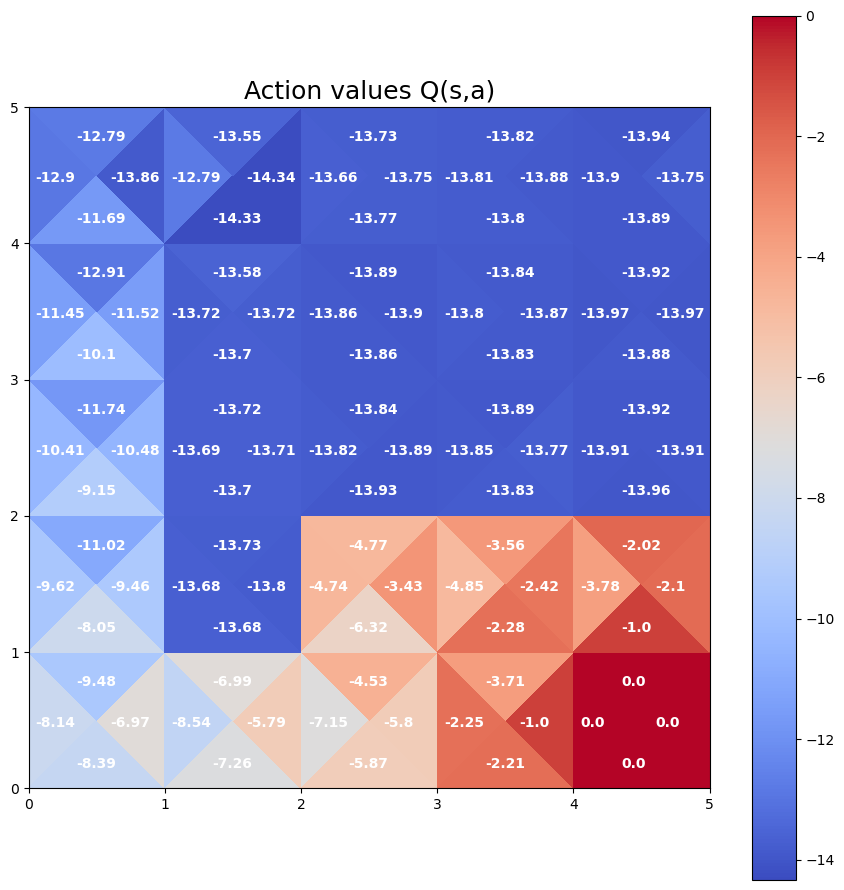

In [32]:
plot_action_values(action_values)

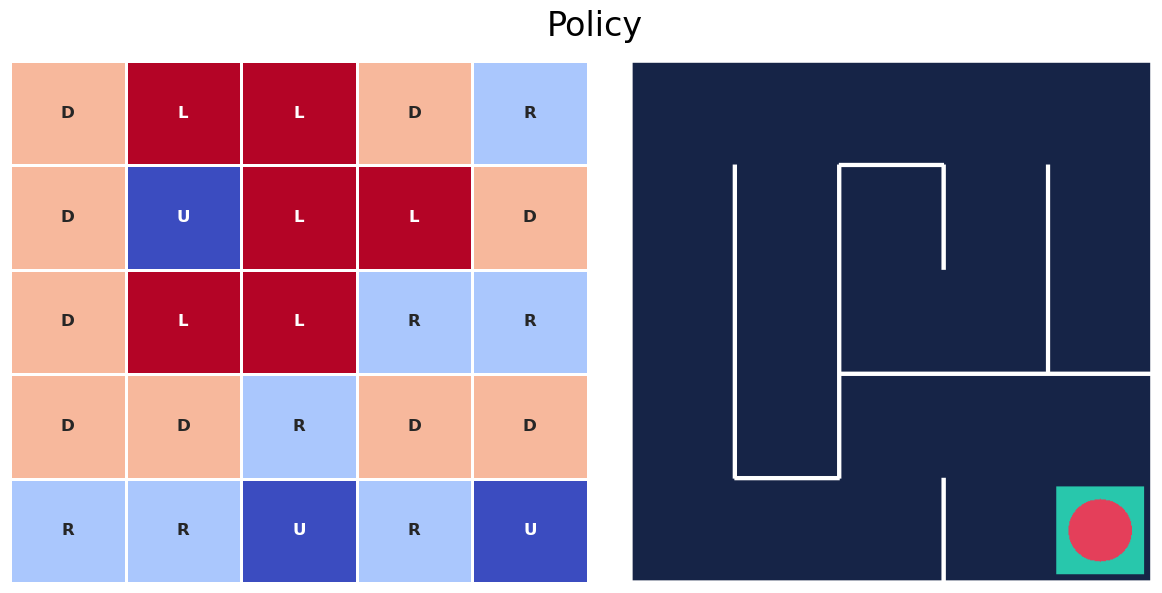

In [33]:
plot_policy(action_values, env.render(mode='rgb_array'))

KeyboardInterrupt: 

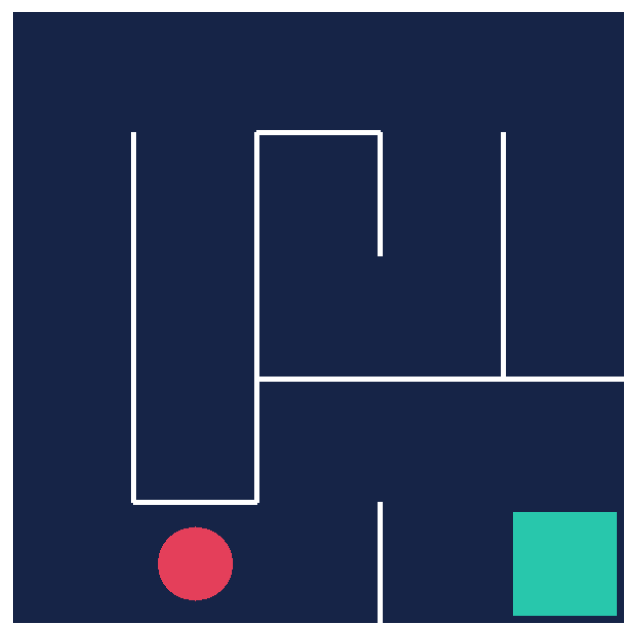

In [34]:
test_agent(env, policy)

In [35]:
policy

<function __main__.policy(state, epsilon=0.2)>

# TIC TAC TOE

In [57]:
import numpy as np

class TicTacToeAgent:

    def __init__(self, learning_rate=0.1):
        self.policy = np.random.randint(0, 2, (3, 3))
        self.learning_rate = learning_rate
        self.gamma = 0.99

    def act(self, state):
        action = self.policy[state]
        return action

    def update_policy(self, state, action, reward, next_state):
        old_value = self.policy[state][action]
        new_value = old_value + self.learning_rate * (reward + self.gamma * self.policy[next_state].max() - old_value)
        self.policy[state][action] = new_value

def main():
    agent = TicTacToeAgent()
    for _ in range(1000):
        state = np.random.randint(0, 2, (3, 3))
        action = agent.act(state)
        reward = 1 if state.max() == 1 else 0
        next_state = np.random.randint(0, 2, (3, 3))
        agent.update_policy(state, action, reward, next_state)

if __name__ == "__main__":
    main()

In [58]:
import numpy as np

# Tic-Tac-Toe game board
class Board:
    def __init__(self):
        self.board = np.zeros((3, 3))

    def is_valid_move(self, row, col):
        return self.board[row][col] == 0

    def make_move(self, row, col, player):
        self.board[row][col] = player

    def is_board_full(self):
        return np.count_nonzero(self.board) == 9

    def is_game_over(self):
        # Check rows
        for i in range(3):
            if np.all(self.board[i, :] == 1) or np.all(self.board[i, :] == 2):
                return True

        # Check columns
        for i in range(3):
            if np.all(self.board[:, i] == 1) or np.all(self.board[:, i] == 2):
                return True

        # Check diagonals
        if np.all(np.diag(self.board) == 1) or np.all(np.diag(self.board) == 2):
            return True
        if np.all(np.diag(np.fliplr(self.board)) == 1) or np.all(np.diag(np.fliplr(self.board)) == 2):
            return True

        return False

    def print_board(self):
        symbols = {0: '_', 1: 'X', 2: 'O'}
        for row in self.board:
            print([symbols[cell] for cell in row])


# SARSA agent
class SarsaAgent:
    def __init__(self, epsilon=0.1, alpha=0.5, gamma=1.0):
        self.epsilon = epsilon  # exploration rate
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.q_values = {}  # action-value table

    def get_action(self, state):
        if np.random.random() < self.epsilon:
            # Explore: select a random action
            action = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8])
        else:
            # Exploit: select the action with maximum value
            if state not in self.q_values:
                self.q_values[state] = np.zeros(9)
            action = np.argmax(self.q_values[state])

        return action

    def update_q_values(self, state, action, reward, next_state, next_action):
        if state not in self.q_values:
            self.q_values[state] = np.zeros(9)
        if next_state not in self.q_values:
            self.q_values[next_state] = np.zeros(9)

        current_value = self.q_values[state][action]
        next_value = self.q_values[next_state][next_action]

        # SARSA update
        updated_value = current_value + self.alpha * (reward + self.gamma * next_value - current_value)
        self.q_values[state][action] = updated_value


# Play Tic-Tac-Toe using SARSA
def play_game(agent):
    board = Board()

    # Players
    player1 = 1
    player2 = 2

    # Initial state and action
    state = board.board.flatten().tobytes()
    action = agent.get_action(state)

    while not board.is_game_over() and not board.is_board_full():
        row = action // 3
        col = action % 3

        if board.is_valid_move(row, col):
            board.make_move(row, col, player1)

            if board.is_game_over():
                reward = 1  # Player 1 wins
                next_state = None
                next_action = None
            elif board.is_board_full():
                reward = 0  # Draw
                next_state = None
                next_action = None
            else:
                next_state = board.board.flatten().tobytes()
                next_action = agent.get_action(next_state)

                row = next_action // 3
                col = next_action % 3
                board.make_move(row, col, player2)

                if board.is_game_over():
                    reward = -1  # Player 2 wins
                else:
                    reward = 0  # Game ongoing

            agent.update_q_values(state, action, reward, next_state, next_action)

            state = next_state
            action = next_action

    board.print_board()
    print("Game Over")


# Training
def train():
    agent = SarsaAgent()

    for _ in range(10000):
        play_game(agent)

    return agent


# Test
def test(agent):
    board = Board()

    # Players
    player1 = 1
    player2 = 2

    while not board.is_game_over() and not board.is_board_full():
        state = board.board.flatten().tobytes()

        if state not in agent.q_values:
            agent.q_values[state] = np.zeros(9)

        action = np.argmax(agent.q_values[state])

        row = action // 3
        col = action % 3

        if board.is_valid_move(row, col):
            board.make_move(row, col, player1)

            if board.is_game_over():
                break
            elif board.is_board_full():
                break

            row, col = input("Enter your move (row col): ").split()
            row = int(row)
            col = int(col)

            while not board.is_valid_move(row, col):
                print("Invalid move. Try again.")
                row, col = input("Enter your move (row col): ").split()
                row = int(row)
                col = int(col)

            board.make_move(row, col, player2)

    board.print_board()
    print("Game Over")


# Train the agent
trained_agent = train()

# Test the agent
test(trained_agent)


KeyboardInterrupt: 